# SVM (Support Vector Machines)
 - *Discriminative classification*: find a line/curve (in two dimensions) or plane/manifold (in multiple dimensions) that divides the classes from each other

---

## Simple Example
- Classification task where two classes of points are well separated:

### Get Data

In [2]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

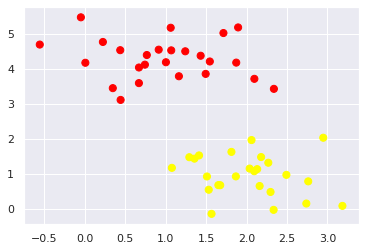

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Draw Separation Lines:
- Can fit multiple lines to separate two groups
- Depending on a line chosen, a point **X** could be assigned to a different group

(-1, 3.5)

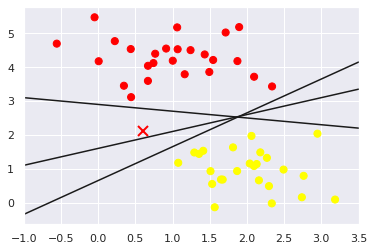

In [4]:
# A line
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

### Maximizing the Margin
- Draw a margin around each line with specific width

(-1, 3.5)

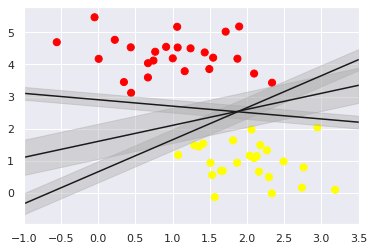

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

---

## SVC: (Support Vector Classifier)
- Use Sklearn SVC to train an SVM model on data. Use a linear kernel with a large *C* parameter 
- Using previously generated Data (X and y)

In [6]:
print(f"X: \n {X[1:5]}")
print(f"y: \n {y[1:5]}")

X: 
 [[1.81336135 1.6311307 ]
 [1.43289271 4.37679234]
 [1.87271752 4.18069237]
 [2.09517785 1.0791468 ]]
y: 
 [1 0 0 1]


In [7]:
from sklearn.svm import SVC # Support Vector Classifier

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Plot SVM decision boundaries:

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                   s=300, linewidth=1, facecolors='none');
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

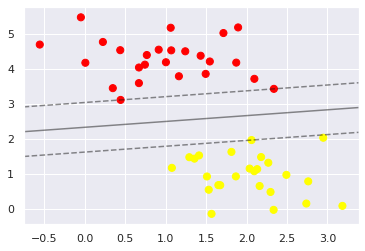

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

### Support Vectors:
- Few of the training points touch the margin, known as the support vectors.
- Access these support vectors with the support_vectors_ attribute of the classifier
- Only the position of the support vectors matter
- Points further from the margin do not modify the fit
- Points away from the margins do not contribute to the loss function used to fit the model

In [10]:
# Get the support vectors
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

---

## Kernel SVM
- Data that is not linearly separable

### Get Data 
- Create data that is not linearly separable

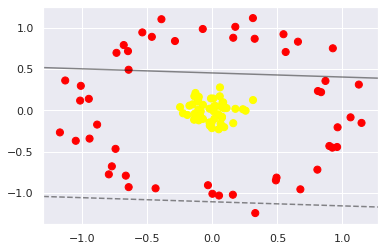

In [11]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


### Switch from Linear to kernelized SVM
- Apply kernelized SVM by changing the linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [12]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

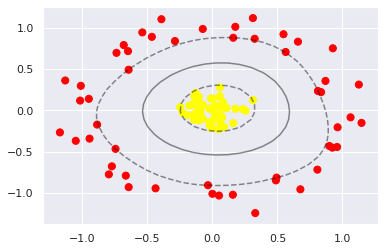

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

---

## Tuning the SVM: Softening Margins
- Working with Data with overlap that is not clearly separatable
- *Soften* the margin: allow some of the points to fit into the margin if that allows a better fit
- The hardness of the margin is controlled by a tuning parameter *C*
- For very large *C*, the margin is hard, and points cannot lie in it. For smaller *C*, the margin is softer, and can grow to encompass some points.

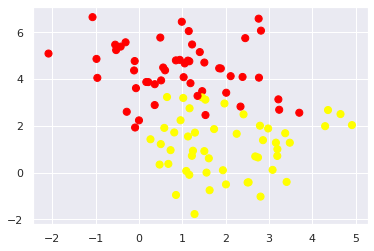

In [14]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

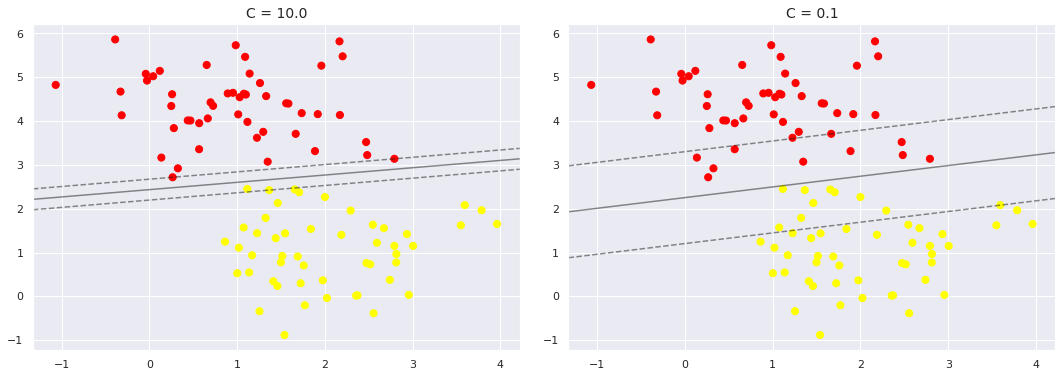

In [15]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

---

## Face Recognition:
- Using sklearn built-in Labeled Faces in the Wild dataset

In [16]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Look at Data:

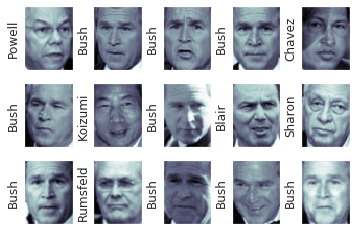

In [17]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],ylabel=faces.target_names[faces.target[i]].split()[-1]) #display Last Names only

### Partition Data:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

### Preproccess with Pipeline
- Each image contains 62x47 pixels.  Use **PCA** preproccessing to reduce dimenstion and extract more important features.
- Make a Pipeline with preproccessing and Model selection

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Extract 150 fundamental components to feed into support vector machine classifier
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Use a grid search cross-validation:
- Explore combinations of parameters to adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) and determine the best model
- Select initial range for parameters and expand the grid to make sure the optimal values fall toward the middle of the grid

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'svc__C': 10, 'svc__gamma': 0.001}
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


### Predict on Test Data:
- Use the cross-validated model to predict the labels for the test data

In [21]:
# Set the Model with the best estimators from Grid Search
model = grid.best_estimator_
y_fit = model.predict(X_test)

### Evaluate Prediction:
- Take a look at a few of the test images along with their predicted values
- Highlight wrong predictions in red

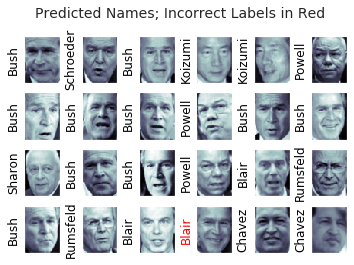

In [22]:
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1],
                   color='black' if y_fit[i] == y_test[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

### Classification report:
- List recovery statistics label by label

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_fit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



### Confusion matrix

Text(73.64857142857144, 0.5, 'predicted label')

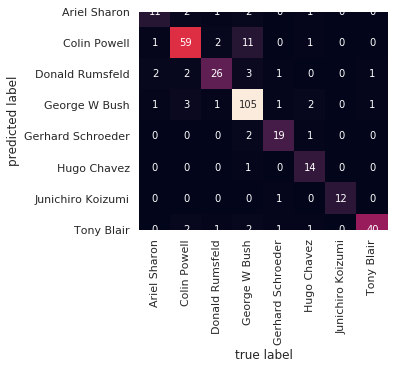

In [24]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

---